### Experiment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
area = 0.09145124999999999782 #ft^2
c_tip = 1.14
c_root = 2
c = 0.12639398377432756182 #ft
S= 13.16898+6.58449
w = 0.25 #lbf

#### $R_e$ = 50000

In [3]:
df5 = pd.read_csv('Re_50000',delimiter = ',',skiprows=1, skipinitialspace=True)
df5 = df5.iloc[1: , :]
df5

,Data Point,Corr Factor,Length Scale,AmbPress,AmbTemp,Density,Viscosity,Motor Speed,Angle of Attack,Corrected q,Avg Velocity,Reynolds number,Axial Force,Normal Force,Pitching Mom
1,1.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,-5.97548794456,0.02002845612,50.47787857056,49957.42187500000,-0.02944010447,-0.34036028215,-1.59475222935
2,2.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,-3.01179203182,0.02060533750,51.19967651367,50671.77734375000,-0.01735702136,-0.31021087760,-1.45284500682
3,3.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,-0.14146897745,0.01945642632,49.75181198120,49238.83984375000,0.00242144757,-0.21656914558,-0.98082570943
4,4.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,3.01308366886,0.01996962487,50.40368652344,49883.99218750000,0.02356630060,-0.12396970556,-0.50579455882
5,5.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,6.40145039679,0.01993330289,50.35782623291,49838.60546875000,0.05891115967,-0.11146803184,-0.47964414410
6,6.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,9.82621906757,0.01965442266,50.00431823730,49488.74218750000,0.09268924987,-0.08700815525,-0.37710888393
7,7.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,12.96900809480,0.01986868088,50.27613449097,49757.75781250000,0.12727933723,-0.04551827616,-0.20027530229
8,8.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,15.94802310062,0.01979789971,50.18650054932,49669.04687500000,0.15306381845,-0.00930372310,-0.04060579207
9,9.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,19.77854635379,0.01935360915,49.62017822266,49108.56250000000,0.18410292230,0.03572708519,0.15266808147
10,10.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,22.99345872678,0.01945335452,49.74788284302,49234.95312500000,0.21041047282,0.07500824761,0.32602720355


In [4]:
df5.columns

Index(['Data Point', 'Corr Factor', 'Length Scale', 'AmbPress', 'AmbTemp',
       'Density', 'Viscosity', 'Motor Speed', 'Angle of Attack', 'Corrected q',
       'Avg Velocity', 'Reynolds number', 'Axial Force', 'Normal Force',
       'Pitching Mom'],
      dtype='object')

In [6]:
q5 = df5['Corrected q'].astype(float)*144.0
alpha5 = df5['Angle of Attack'].astype(float)
alphai = [math.radians(i) for i in alpha5]
N5 = df5['Normal Force'].astype(float)
A5 = df5['Axial Force'].astype(float)
L5 = N5*np.cos(alphai)-A5*np.sin(alphai)
D5 = N5*np.sin(alphai)+A5*np.cos(alphai)
M5= -N5*(4.6)+df5['Pitching Mom'].astype(float)

In [8]:
q = df5['Corrected q'].astype(float)*144.0
Cl5 = L5/(q*area)
Cd5 = D5/(q*area)
Cm5 = M5/(q*area*c)

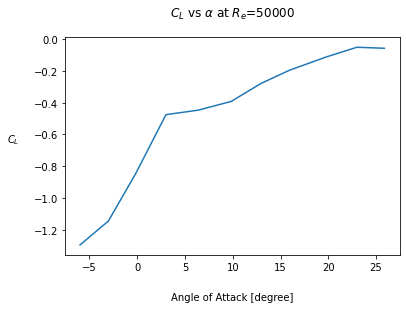

In [9]:
plt.figure
plt.title('$C_L$ vs $\\alpha$ at $R_e$=50000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_L$', rotation=0,labelpad=20)
plt.plot(alpha5,Cl5,label='$C_L$')

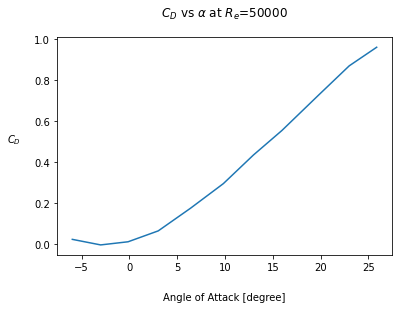

In [10]:
plt.figure
plt.title('$C_D$ vs $\\alpha$ at $R_e$=50000',pad = 20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_D$', rotation=0,labelpad =20)
plt.plot(alpha5,Cd5,label='$C_D$')

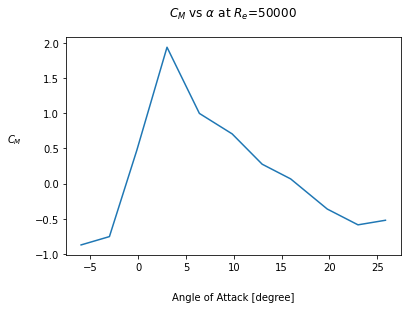

In [11]:
plt.figure
plt.title('$C_M$ vs $\\alpha$ at $R_e$=50000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad = 20)
plt.ylabel('$C_M$',rotation=0,labelpad=20)
plt.plot(alpha5,Cm5,label='$C_D$')

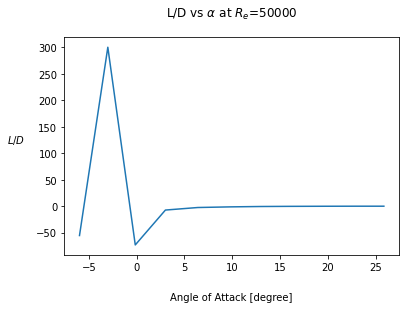

In [12]:
plt.figure
plt.title('L/D vs $\\alpha$ at $R_e$=50000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad = 20)
plt.ylabel('$L/D$',rotation=0,labelpad=20)
plt.plot(alpha5,L5/D5,label='$C_L$')

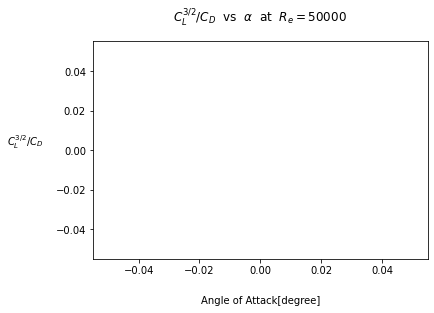

In [13]:
Cl_23 = Cl5**1.5
plt.figure
plt.title('$C_L^{3/2}/C_D$'+ '  vs'+ '  $\\alpha$'+ '  at' + '  $R_e=50000$',pad=20)
plt.ylabel('$C_L^{3/2}/C_D$',rotation=0,labelpad=30)
plt.xlabel('Angle of Attack[degree]',labelpad=20)
plt.plot(alpha5,Cl_23/Cd5,label='$C_L$')

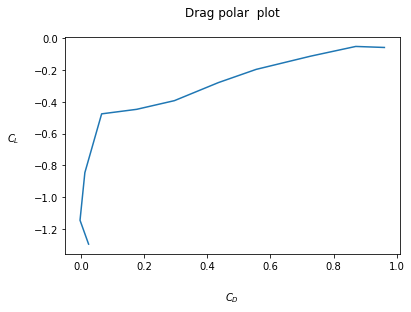

In [14]:
plt.figure
plt.title('Drag polar  plot',pad = 20)
plt.xlabel('$C_D$',labelpad = 20)
plt.ylabel('$C_L$',rotation=0,labelpad=20)
plt.plot(Cd5,Cl5,label='$C_L$')

#### $R_e=80000$

In [17]:
df8 = pd.read_csv('Re_80000',delimiter = ',',skiprows=1, skipinitialspace=True)
df8 = df8.iloc[1: , :]
df8

,Data Point,Corr Factor,Length Scale,AmbPress,AmbTemp,Density,Viscosity,Motor Speed,Angle of Attack,Corrected q,Avg Velocity,Reynolds number,Axial Force,Normal Force,Pitching Mom
1,1.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,-5.97612681879,0.05111702151,80.64178466797,79810.32031250000,0.01475998543,-0.60753786710,-2.94599063559
2,2.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,-4.08525352172,0.05045011349,80.11399841309,79287.97656250000,-0.00066064327,-0.50767729567,-2.46864058214
3,3.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,-2.03923100541,0.05002198103,79.77334594727,78950.83593750000,0.02773239199,-0.33638704524,-1.59578148100
4,4.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,-0.03854078268,0.05008112360,79.82048797607,78997.49218750000,0.02518462269,-0.19429269112,-0.87280672396
5,5.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,1.98649610384,0.04969022637,79.50836944580,78688.58593750000,0.04977622541,-0.04136042178,-0.09758225088
6,6.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,3.94139571017,0.05086607289,80.44359588623,79614.17187500000,0.05361856872,0.10386411024,0.64464643988
7,7.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,5.95153016073,0.04967266728,79.49431610107,78674.67968750000,0.09552491185,0.13237029137,0.77119949017
8,8.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,8.04999591862,0.05013068236,79.85997009277,79036.56250000000,0.12874090091,0.13116547372,0.66098028708
9,9.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,10.06492192595,0.05034388724,80.02961730957,79204.46093750000,0.14764063212,0.16055120308,0.76602937617
10,10.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,12.02941853438,0.05021990992,79.93101501465,79106.87500000000,0.16784665045,0.22299356392,1.04256381498


In [18]:
df8.columns

Index(['Data Point', 'Corr Factor', 'Length Scale', 'AmbPress', 'AmbTemp',
       'Density', 'Viscosity', 'Motor Speed', 'Angle of Attack', 'Corrected q',
       'Avg Velocity', 'Reynolds number', 'Axial Force', 'Normal Force',
       'Pitching Mom'],
      dtype='object')

In [19]:
q8 = df8['Corrected q'].astype(float)*144.0
alpha8 = df8['Angle of Attack'].astype(float)
alphai = [math.radians(i) for i in alpha8]
N8 = df8['Normal Force'].astype(float)
A8 = df8['Axial Force'].astype(float)
L8 = N8*np.cos(alphai)-A8*np.sin(alphai)
D8 = N8*np.sin(alphai)+A8*np.cos(alphai)
M8 = -N8*4.6+df8['Pitching Mom'].astype(float)

In [20]:
q8 = df8['Corrected q'].astype(float)*144.0
Cl8 = L8/(q8*area)
Cd8 = D8/(q8*area)
Cm8 = M8/(q8*area*c)

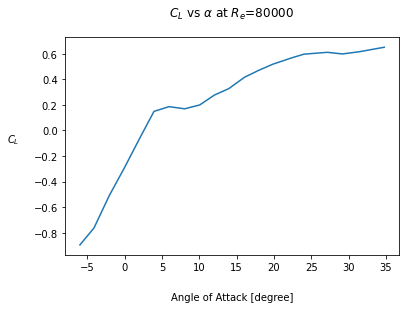

In [21]:
plt.figure
plt.title('$C_L$ vs $\\alpha$ at $R_e$=80000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_L$', rotation=0,labelpad=20)
plt.plot(alpha8,Cl8,label='$C_L$')

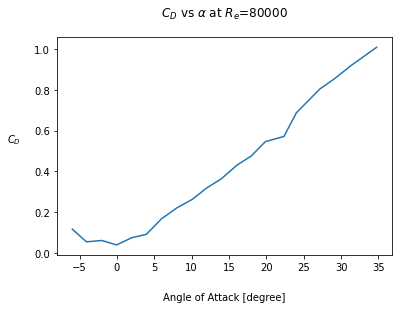

In [22]:
plt.figure
plt.title('$C_D$ vs $\\alpha$ at $R_e$=80000',pad = 20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_D$', rotation=0,labelpad =20)
plt.plot(alpha8,Cd8,label='$C_D$')

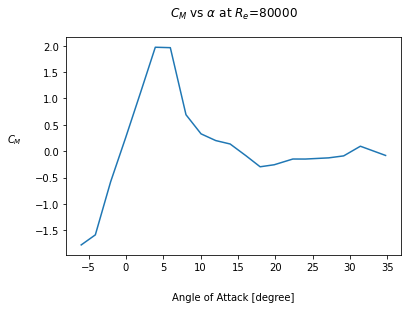

In [23]:
plt.figure
plt.title('$C_M$ vs $\\alpha$ at $R_e$=80000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad = 20)
plt.ylabel('$C_M$',rotation=0,labelpad=20)
plt.plot(alpha8,Cm8,label='$C_D$')

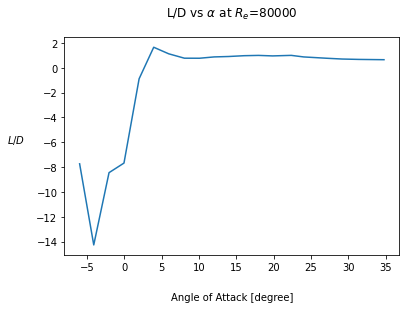

In [24]:
plt.figure
plt.title('L/D vs $\\alpha$ at $R_e$=80000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad = 20)
plt.ylabel('$L/D$',rotation=0,labelpad=20)
plt.plot(alpha8,L8/D8,label='$C_L$')

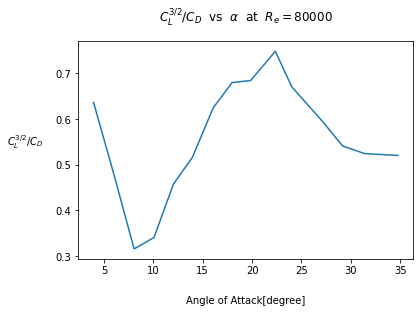

In [25]:
plt.figure
plt.title('$C_L^{3/2}/C_D$'+ '  vs'+ '  $\\alpha$'+ '  at' + '  $R_e=80000$',pad=20)
plt.ylabel('$C_L^{3/2}/C_D$',rotation=0,labelpad=30)
plt.xlabel('Angle of Attack[degree]',labelpad=20)
plt.plot(alpha8,(Cl8**(3/2))/Cd8,label='$C_L$')

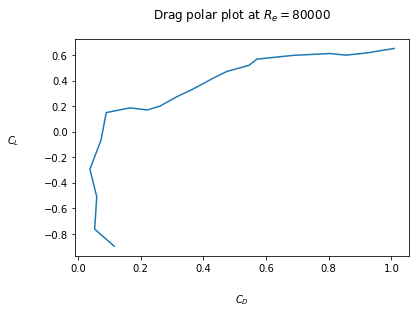

In [26]:
plt.figure
plt.title('Drag polar plot at $R_e=80000$',pad=20)
plt.ylabel('$C_L$',rotation=0,labelpad=30)
plt.xlabel('$C_D$',labelpad=20)
plt.plot(Cd8,Cl8,label='$C_L$')

#### $R_e=90000$

In [27]:
df9 = pd.read_csv('Re_90000',delimiter = ',',skiprows=1, skipinitialspace=True)
df9 = df9.iloc[1: , :]
df9

,Data Point,Corr Factor,Length Scale,AmbPress,AmbTemp,Density,Viscosity,Motor Speed,Angle of Attack,Corrected q,Avg Velocity,Reynolds number,Axial Force,Normal Force,Pitching Mom
1,1.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,34.32214333339,0.06351184799,89.88862609863,88961.82031250000,0.32862733997,0.96928920533,4.46674573145
2,2.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,29.31624426118,0.06720368748,92.46426391602,91510.89843750000,0.32224343132,0.94583758069,4.35414417625
3,3.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,27.08032332266,0.06499635876,90.93307495117,89995.50000000000,0.30712903069,0.85392031011,3.92303535089
4,4.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,25.09273002176,0.06488389551,90.85437011719,89917.60156250000,0.28584265619,0.80576906099,3.70289359944
5,5.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,21.99099560845,0.06483105740,90.81736755371,89880.98437500000,0.24454277794,0.73209969907,3.34938426981
6,6.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,19.97122249008,0.06431159589,90.45279693604,89520.17187500000,0.25201875585,0.66723239334,3.03838444615
7,7.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,18.05221094950,0.06349038169,89.87342834473,88946.78125000000,0.21952515022,0.57695025510,2.62296939023
8,8.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,16.13893538847,0.06518492177,91.06488037109,90125.94531250000,0.22456128668,0.52310328080,2.37902566308
9,9.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,13.82439125327,0.06309409842,89.59251403809,88668.75781250000,0.20210243234,0.43117526178,1.97441822112
10,10.00000000000,0.91000000000,2.00000000000,14.35631450000,532.17000000000,0.00226379858,0.00000038123,0.00000000000,12.10497235701,0.06243413828,89.12271881104,88203.80468750000,0.10218735403,0.34854410431,1.60382320171


In [28]:
df9.columns

Index(['Data Point', 'Corr Factor', 'Length Scale', 'AmbPress', 'AmbTemp',
       'Density', 'Viscosity', 'Motor Speed', 'Angle of Attack', 'Corrected q',
       'Avg Velocity', 'Reynolds number', 'Axial Force', 'Normal Force',
       'Pitching Mom'],
      dtype='object')

In [30]:
q9 = df9['Corrected q'].astype(float)*144.0
alpha9 = df9['Angle of Attack'].astype(float)
alphai = [math.radians(i) for i in alpha9]
N9 = df9['Normal Force'].astype(float)
A9 = df9['Axial Force'].astype(float)
L9 = N9*np.cos(alphai)-A9*np.sin(alphai)
D9 = N9*np.sin(alphai)+A9*np.cos(alphai)
M9 = -N9*(4.6)+df9['Pitching Mom'].astype(float)

In [31]:
q = df9['Corrected q'].astype(float)*144.0
Cl9 = L9/(q*area)
Cd9 = D9/(q*area)
Cm9 = M9/(q*area*c)

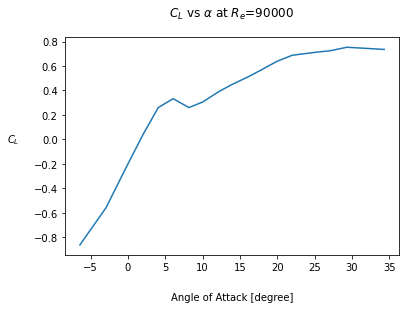

In [32]:
plt.figure
plt.title('$C_L$ vs $\\alpha$ at $R_e$=90000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_L$', rotation=0,labelpad=20)
plt.plot(alpha9,Cl9,label='$C_L$')

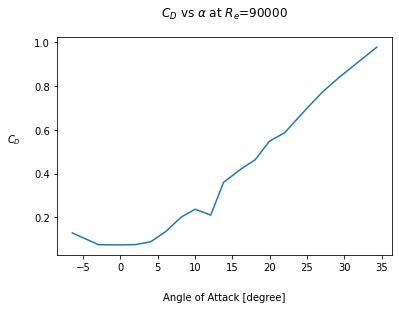

In [33]:
plt.figure
plt.title('$C_D$ vs $\\alpha$ at $R_e$=90000',pad = 20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_D$', rotation=0,labelpad =20)
plt.plot(alpha9,Cd9,label='$C_D$')

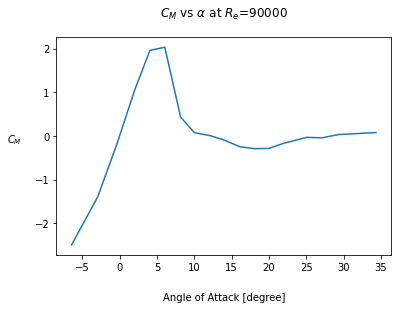

In [34]:
plt.figure
plt.title('$C_M$ vs $\\alpha$ at $R_e$=90000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad = 20)
plt.ylabel('$C_M$',rotation=0,labelpad=20)
plt.plot(alpha9,Cm9,label='$C_M$')

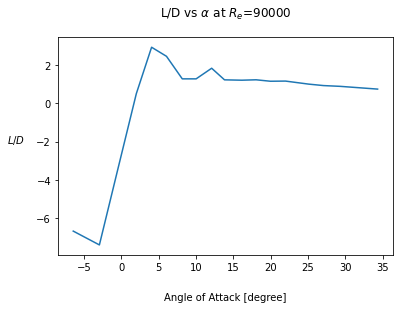

In [35]:
plt.figure
plt.title('L/D vs $\\alpha$ at $R_e$=90000',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad = 20)
plt.ylabel('$L/D$',rotation=0,labelpad=20)
plt.plot(alpha9,L9/D9,label='$C_L$')

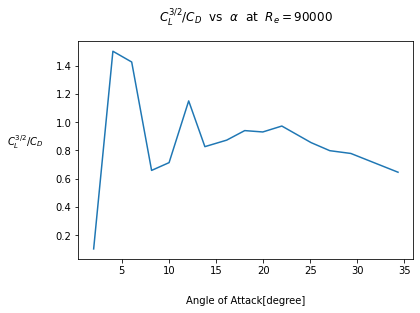

In [36]:
plt.figure
plt.title('$C_L^{3/2}/C_D$'+ '  vs'+ '  $\\alpha$'+ '  at' + '  $R_e=90000$',pad=20)
plt.ylabel('$C_L^{3/2}/C_D$',rotation=0,labelpad=30)
plt.xlabel('Angle of Attack[degree]',labelpad=20)
plt.plot(alpha9,(Cl9**(3/2))/Cd9,label='$C_L$')

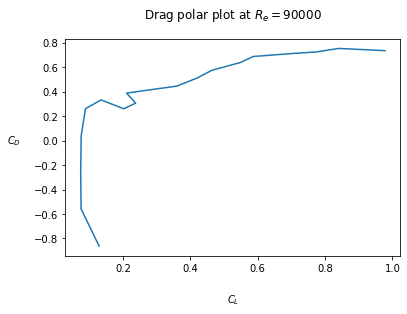

In [37]:
plt.figure
plt.title('Drag polar plot at $R_e=90000$',pad = 20)
plt.xlabel('$C_L$',labelpad = 20)
plt.ylabel('$C_D$',rotation=0,labelpad=20)
plt.plot(Cd9,Cl9,label='$C_L$')

#### Overall comparison

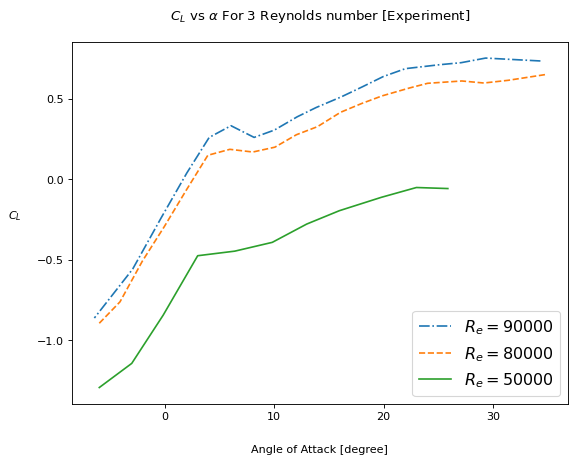

In [38]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('$C_L$ vs $\\alpha$ For 3 Reynolds number [Experiment]',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_L$', rotation=0,labelpad=20)
plt.plot(alpha9,Cl9,'-.',label='$R_e=90000$')
plt.plot(alpha8,Cl8,'--',label='$R_e=80000$')
plt.plot(alpha5,Cl5,label='$R_e=50000$')
plt.legend(fontsize='x-large')

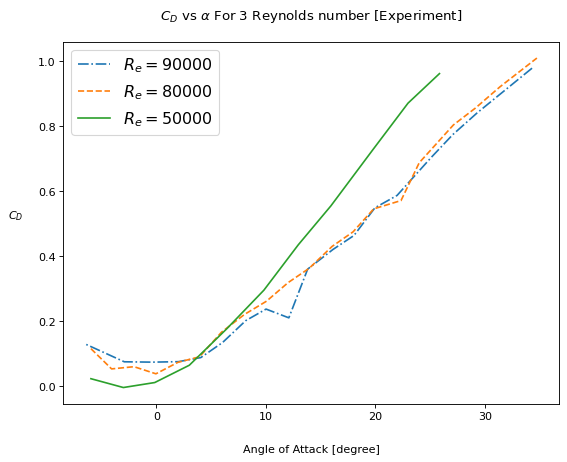

In [39]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('$C_D$ vs $\\alpha$ For 3 Reynolds number [Experiment]',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_D$', rotation=0,labelpad=20)
plt.plot(alpha9,Cd9,'-.',label='$R_e=90000$')
plt.plot(alpha8,Cd8,'--',label='$R_e=80000$')
plt.plot(alpha5,Cd5,label='$R_e=50000$')
plt.legend(fontsize='x-large')

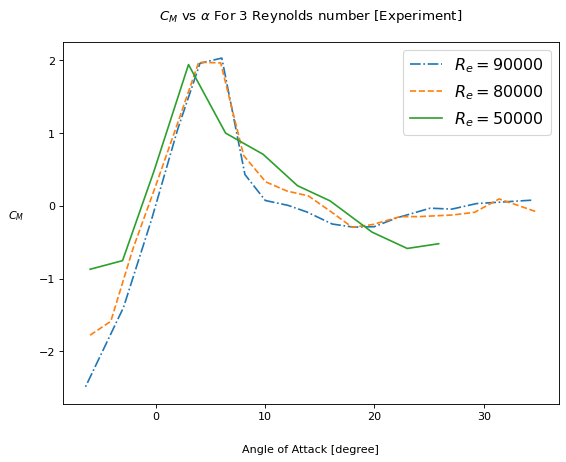

In [40]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('$C_M$ vs $\\alpha$ For 3 Reynolds number [Experiment]',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('$C_M$', rotation=0,labelpad=20)
plt.plot(alpha9,Cm9,'-.',label='$R_e=90000$')
plt.plot(alpha8,Cm8,'--',label='$R_e=80000$')
plt.plot(alpha5,Cm5,label='$R_e=50000$')
plt.legend(fontsize='x-large')

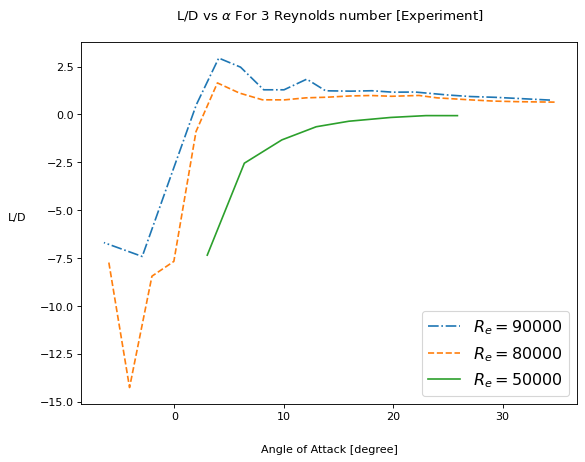

In [41]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('L/D vs $\\alpha$ For 3 Reynolds number [Experiment]',pad=20)
plt.xlabel('Angle of Attack [degree]',labelpad=20)
plt.ylabel('L/D', rotation=0,labelpad=20)
plt.plot(alpha9,L9/D9,'-.',label='$R_e=90000$')
plt.plot(alpha8,L8/D8,'--',label='$R_e=80000$')
plt.plot(alpha5,L5/D5[3:],label='$R_e=50000$')
plt.legend(fontsize='x-large')

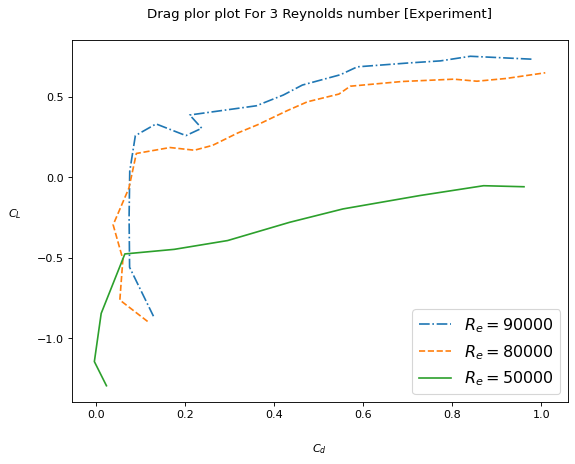

In [42]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('Drag plor plot For 3 Reynolds number [Experiment]',pad=20)
plt.xlabel('$C_d$',labelpad=20)
plt.ylabel('$C_L$', rotation=0,labelpad=20)
plt.plot(Cd9,Cl9,'-.',label='$R_e=90000$')
plt.plot(Cd8,Cl8,'--',label='$R_e=80000$')
plt.plot(Cd5,Cl5,label='$R_e=50000$')
plt.legend(fontsize='x-large')

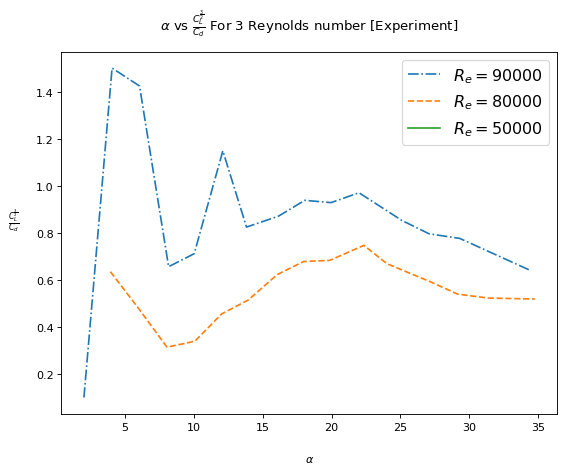

In [43]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('$\\alpha$ vs $\\frac{C_L^{\\frac{3}{2}}}{C_d}$ For 3 Reynolds number [Experiment]',pad=20)
plt.xlabel('$\\alpha$',labelpad=20)
plt.ylabel('$\\frac{C_L^{\\frac{3}{2}}}{C_d}$', rotation=0,labelpad=20)
plt.plot(alpha9,Cl9**1.5/Cd9,'-.',label='$R_e=90000$')
plt.plot(alpha8,Cl8**1.5/Cd8,'--',label='$R_e=80000$')
plt.plot(alpha5,Cl5**1.5/Cd5,label='$R_e=50000$')
plt.legend(fontsize='x-large')

In [44]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title('$\\alpha$ vs $\\frac{C_L^{\\frac{3}{2}}}{C_d}$ For 3 Reynolds number [Experiment]',pad=20)
plt.xlabel('$\\alpha$',labelpad=20)
plt.ylabel('$\\frac{C_L^{\\frac{3}{2}}}{C_d}$', rotation=0,labelpad=20)
plt.plot(alpha9,,label='$R_e=90000$')
plt.plot(alpha8,Cl8**1.5/Cd8,label='$R_e=80000$')
plt.plot(alpha5,Cl5**1.5/Cd5,label='$R_e=50000$')
plt.legend()

SyntaxError: invalid syntax (Temp/ipykernel_13596/1770679185.py, line 5)

#### neutral point 

In [ ]:
#find center of pressure
stds = []
for i in np.arange(-5,0,0.001):
    Mi = -N9*(i)+ M9
    s = np.std(Mi)
    stds.append((i,s))
a = min(stds, key=lambda x: x[1])
a

In [529]:
Mi = -N*a[0]+ M9

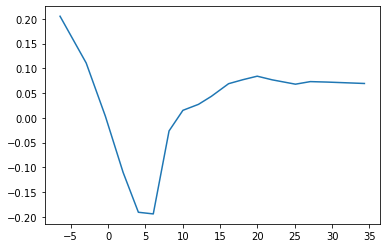

In [530]:
plt.plot(alpha9,Mi)

In [122]:
D= np.arange(-6.0,6.0,0.0001) + center
H = []
for i in N:
    H.append(i*D)
len(H[1])
    

120000

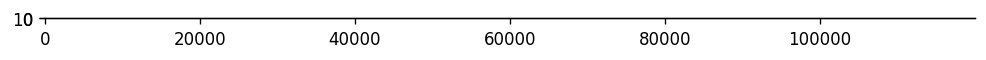

In [123]:
plt.figure(figsize=(10, 15), dpi=120)
plt.imshow(H, interpolation='nearest')
dpi=10

In [124]:
H = np.asarray(H)
stds=H.std(axis=0)
print(stds.shape)
m_in=np.argmin(stds)

(120000,)


In [125]:
D[m_in]

4.376103560549405e-06

1     4.241710e-06
2     4.139083e-06
3     3.736844e-06
4     3.526129e-06
5     3.203744e-06
6     2.919878e-06
7     2.524794e-06
8     2.289154e-06
9     1.886868e-06
10    1.525265e-06
11    1.257058e-06
12    1.053300e-06
13    1.280906e-06
14    9.796675e-07
15    1.552291e-07
16   -9.050175e-07
17   -2.069484e-06
18   -3.185413e-06
Name: Normal Force, dtype: float64

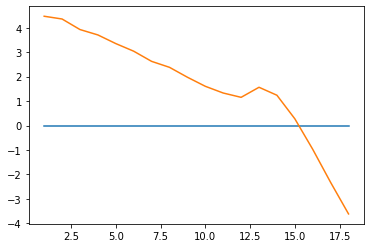

In [126]:
m2 = N*(D[m_in])
plt.plot(m2)
plt.plot(M)
m2

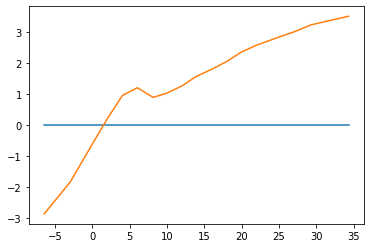

In [131]:
plt.plot(alpha,m2/(q*area*c))
plt.plot(alpha,Cm)

In [792]:
d = {'$R_e$': [50000,80000,90000], 'Maximum L/D': [-1.067,0.324,0.673322]}
df = pd.DataFrame(data=d)
df

,$R_e$,Maximum L/D
0,50000,-1.067000
1,80000,0.324000
2,90000,0.673322


In [787]:
L5/D5

1     -96.154003
2     542.201319
3    -157.826662
4     -22.038475
5      -7.965623
6      -4.596590
7      -2.837195
8      -2.081386
9      -1.503673
10     -1.180048
11     -1.066510
dtype: float64